In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [8]:
file_path = 'C:/Users/VARGAS M/Desktop/Data Sets/SalesAnalysis/Sales_Data/'

all_months_sales = pd.DataFrame()

for file in os.listdir(file_path):
    df = pd.read_csv('C:/Users/VARGAS M/Desktop/Data Sets/SalesAnalysis/Sales_Data/' + file)
    all_months_sales = pd.concat([all_months_sales,df])


In [9]:
all_data = all_months_sales.copy()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean data

In [15]:
nan_df =  all_data[all_data.isnull().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
all_data = all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Add month column

In [26]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data = all_data[all_data.Month != 'Or']
all_data.Month = all_data.Month.astype('int32')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Add Income column

In [27]:
all_data['Income'] = all_data.loc[:,'Quantity Ordered']*all_data.loc[:,'Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [28]:
income_per_month = all_data.groupby('Month', as_index=False).Income.sum()
income_per_month

,Month,Income
0,1,1.822257e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06
5,6,2.577802e+06
6,7,2.647776e+06
7,8,2.244468e+06
8,9,2.097560e+06
9,10,3.736727e+06


#### Plot Income per month

Text(0.5, 1.0, 'Income per month')

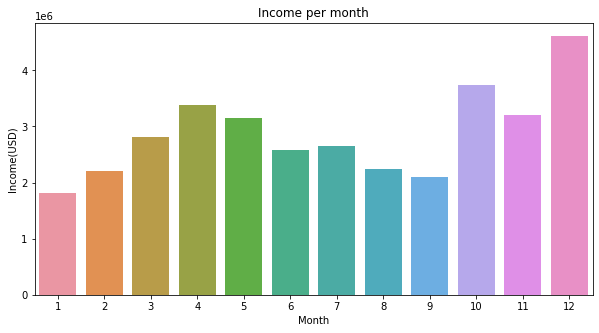

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Income', data=income_per_month)
plt.ylabel('Income(USD)')
plt.title('Income per month')

#### Add a city column

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
def get_city(address):
    return address.split(', ')[1]
    
def get_state(address):
    return address.split(', ')[2].split(' ')[0]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda df: get_city(df) + ' ('+ get_state(df) + ')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [32]:
income_per_city = all_data.groupby('City',as_index=False).Income.sum()
income_per_city

,City,Income
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06
5,New York City (NY),4.664317e+06
6,Portland (ME),4.497583e+05
7,Portland (OR),1.870732e+06
8,San Francisco (CA),8.262204e+06
9,Seattle (WA),2.747755e+06


Text(0.5, 1.0, 'Income per city')

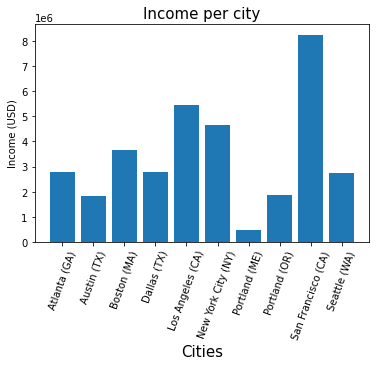

In [33]:

plt.bar(income_per_city['City'],income_per_city['Income'])
degrees = 70
plt.xticks(rotation = degrees)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Income (USD)', fontsize = 10)
plt.title('Income per city', fontsize = 15)

#### Add hour column to get quantities of orders per hour

In [34]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [36]:
order_per_hour = all_data.groupby('Hour').count()
order_per_hour = order_per_hour.drop(columns=['Price Each','Month','Income','Product','Order ID','City','Purchase Address','Order Date'])
order_per_hour.head()

,Quantity Ordered
Hour,
0,3910
1,2350
2,1243
3,831
4,854


([<matplotlib.axis.XTick at 0x6cb71ee1f0>,
 <a list of 24 Text major ticklabel objects>)

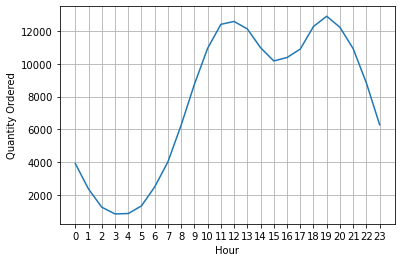

In [37]:
sns.lineplot(x=order_per_hour.index,y='Quantity Ordered', data=order_per_hour)
plt.grid()
plt.xticks(order_per_hour.index)

#### What product are the often most sold together?

In [98]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # check if there are duplicated Orders
df['Grouped'] = df.groupby('Order ID').Product.transform(lambda x:', '.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-98-6d4a60ca297e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID').Product.transform(lambda x:', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [99]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df.Grouped:
    row = row.split(', ')
    count.update(Counter(combinations(row,2)))

#for key, value in count.most_common(10):
 #   print(key,value)

#### What product sold the most?

In [101]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [135]:
product_count = all_data.groupby('Product').sum()
product_count = product_count.drop(columns=['Price Each','Month','Income','Hour'])
product_count

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


Text(0.5, 0, 'Product')

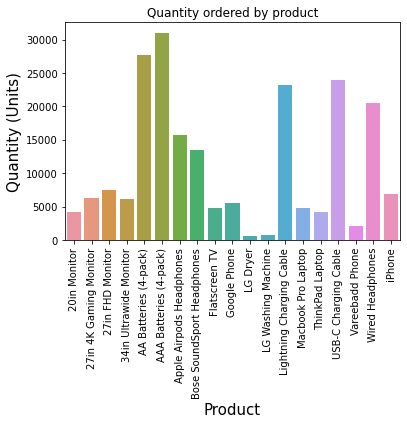

In [172]:
sns.barplot(x=product_count.index, y='Quantity Ordered', data=product_count)
plt.xticks(rotation = 'vertical')
plt.title('Quantity ordered by product')
plt.ylabel('Quantity (Units)', fontsize = 15)
plt.xlabel('Product', fontsize = 15)

In [171]:
prices = all_data.groupby('Product').mean()
prices = prices.drop(columns=['Quantity Ordered', 'Month', 'Income', 'Hour'])
prices.head()

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84


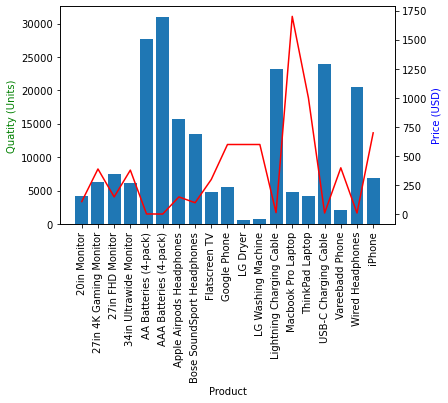

In [181]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_count.index, product_count['Quantity Ordered'])
ax2.plot(prices.index, prices['Price Each'], 'r-')

ax1.set_xlabel('Product')
ax1.set_xticklabels(product_count.index, rotation='vertical')
ax1.set_ylabel('Quatity (Units)', color='g')
ax2.set_ylabel('Price (USD)', color='b')


plt.show()